In [1]:
import pandas as pd

In [5]:
birddata = pd.read_csv('bird_tracking.csv', index_col= 0)
birddata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61920 entries, 0 to 61919
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   altitude            61920 non-null  int64  
 1   date_time           61920 non-null  object 
 2   device_info_serial  61920 non-null  int64  
 3   direction           61477 non-null  float64
 4   latitude            61920 non-null  float64
 5   longitude           61920 non-null  float64
 6   speed_2d            61477 non-null  float64
 7   bird_name           61920 non-null  object 
dtypes: float64(4), int64(2), object(2)
memory usage: 4.3+ MB


PLOTTING Lats & Longs for a bird in 2D 

In [7]:
import matplotlib.pyplot as plt
import numpy as np

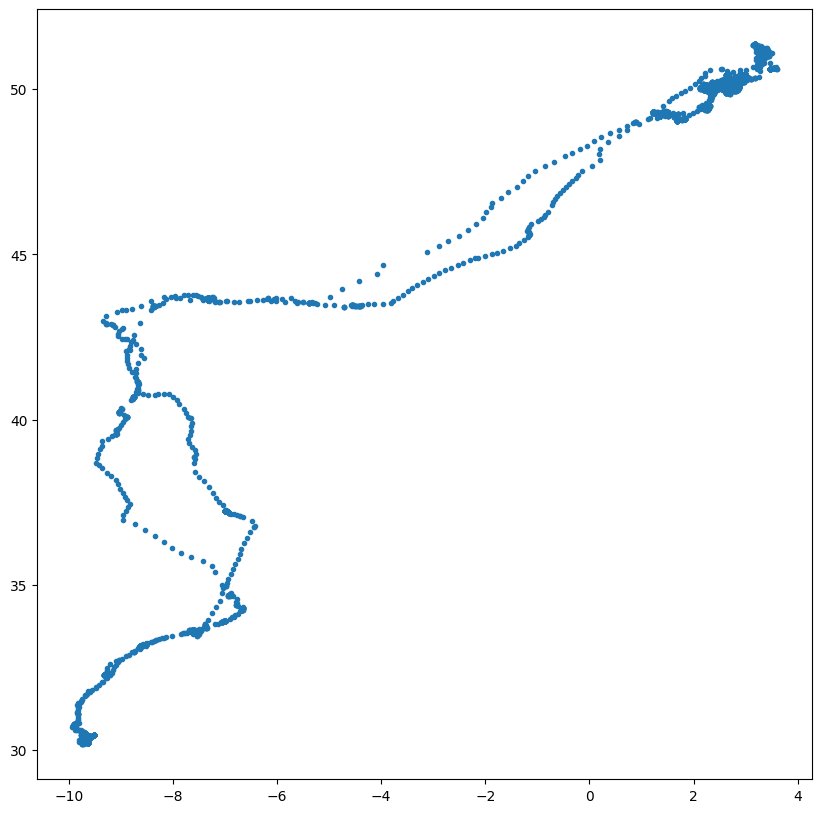

<Figure size 640x480 with 0 Axes>

In [13]:
ix = birddata.bird_name == "Eric"
x , y = birddata.longitude[ix], birddata.latitude[ix]
plt.figure(figsize=(10,10))
plt.plot(x,y,'.')
plt.show()
plt.savefig('eric_flightpath.pdf')

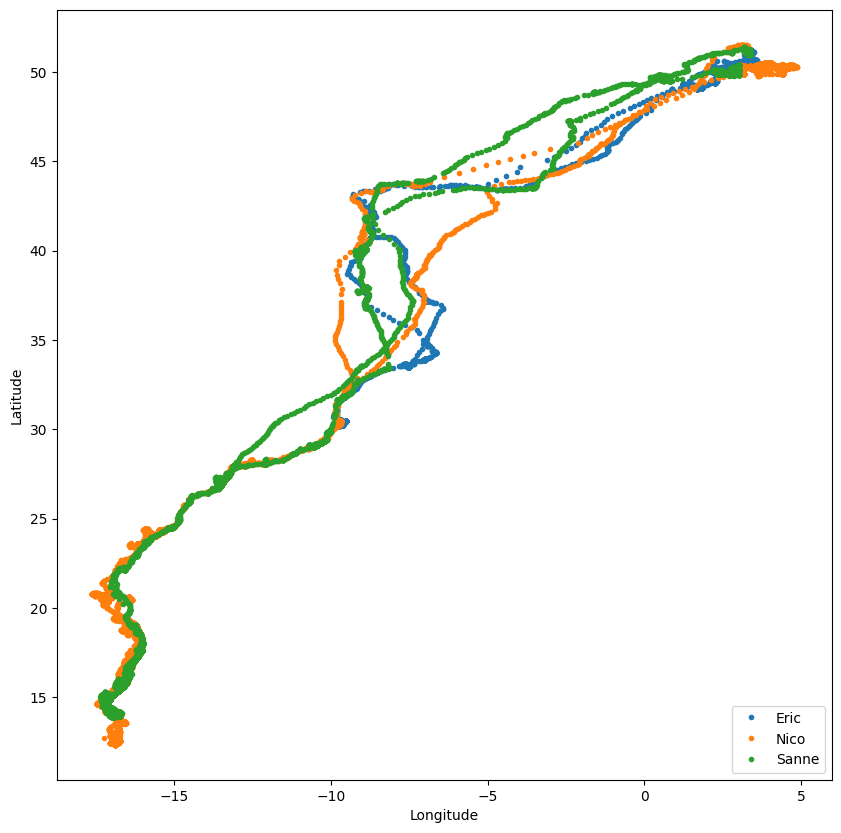

In [15]:
bird_names = pd.unique(birddata.bird_name)
plt.figure(figsize=(10,10))
for bird_name in bird_names:
    ix = birddata.bird_name == bird_name
    x , y = birddata.longitude[ix], birddata.latitude[ix]
    plt.plot(x,y,'.', label=bird_name)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc='lower right')
plt.savefig('allpath.pdf')

**4.2.3: Examining Flight Speed**

(array([3., 1., 0., 0., 1., 2., 2., 0., 0., 1.]),
 array([0.15      , 0.59422108, 1.03844216, 1.48266324, 1.92688432,
        2.3711054 , 2.81532648, 3.25954756, 3.70376864, 4.14798972,
        4.5922108 ]),
 <BarContainer object of 10 artists>)

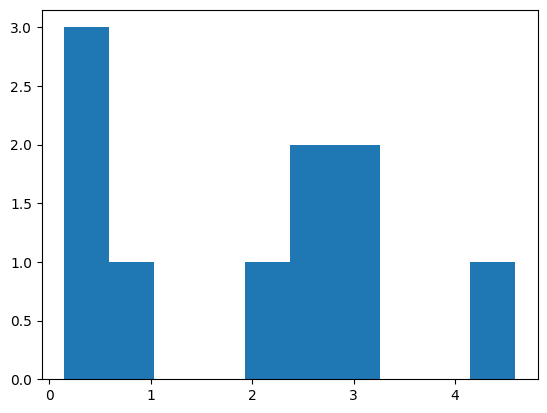

In [17]:
ix = birddata.bird_name == "Eric"
speed = birddata.speed_2d[ix]
plt.hist(speed[:10])

In [26]:
a = np.isnan(speed)
pd.unique(a)

array([False,  True])

In [27]:
index = np.isnan(speed)

In [28]:
~index

0        True
1        True
2        True
3        True
4        True
         ... 
19790    True
19791    True
19792    True
19793    True
19794    True
Name: speed_2d, Length: 19795, dtype: bool

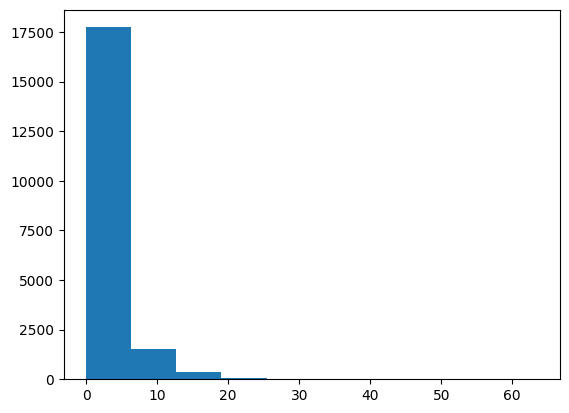

In [30]:
plt.hist(speed[~index])
plt.savefig('hist.pdf')

**4.2.4: Using Datetime**

In [37]:
import datetime
datetime.datetime.today()


datetime.datetime(2023, 9, 29, 17, 38, 37, 251219)

In [41]:
ix = birddata.bird_name == "Sanne"
birddata[ix].head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
40916,55,2013-08-15 00:01:08+00,833,-91.499509,49.931065,2.281893,0.372156,Sanne
40917,54,2013-08-15 00:31:00+00,833,-141.804053,49.931076,2.281900,1.318484,Sanne
40918,55,2013-08-15 01:01:19+00,833,-10.651840,49.931016,2.281933,0.076158,Sanne
40919,56,2013-08-15 01:31:38+00,833,14.727689,49.931053,2.281911,0.014142,Sanne
40920,55,2013-08-15 02:01:24+00,833,-169.882200,49.931042,2.281893,0.094340,Sanne


In [46]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

